<h1 style="text-align: center;">Principal component analysis</h1>

# Teori

Akan dilakukan proyeksi dari data berdimensi $M$ menjadi berdimensi $D$.

PCA akan mendefinisikan $D$ vektor, $\mathbf{w}_{d}$, masing-masing berdimensi $M$. Elemen ke $d$ dari proyeksi $x_{nd}$ di mana $\mathbf{x}_{nd} = [ x_{n1}, x_{n2}, \ldots, x_{nD} ]^{\mathrm{T}}$ dihitung sebagai:

$$
x_{nd} = \mathbf{w}^{\mathrm{T}}_{d} \mathbf{y}_{n}
$$


Proses pembelajaran dalam hal ini adalah berapa dimensi $D$ dan memilih vektor proyeksi $\mathbf{w}_{d}$ untuk setiap dimensi.

PCA menggunakan variansi pada ruang yang diproyeksikan sebagai kriteria untuk memilih $\mathbf{w}_{d}$.

Misalnya: $\mathbf{w}_{1}$ adalah proyeksi yang akan membuat variansi pada $x_{n1}$ semaksimal mungkin.

Dimensi proyeksi kedua juga dipilih untuk memaksimalkan variansi, namum $\mathbf{w}_{2}$ harus ortogonal terhadap $\mathbf{w}_{1}$:
$$
\mathbf{w}_{1}^{\mathrm{T}} \mathbf{w}_{1} = 0
$$

Begitu juga untuk dimensi proyeksi yang ketiga dan seterusnya.

Secara umum:
$$
\mathbf{w}_{i}^{\mathrm{T}} \mathbf{w}_{j} = 0 \, \forall\, j \neq i
$$

Asumsi:
$$
\bar{\mathbf{y}} = \frac{1}{N} \sum_{n=1}^{N} \mathbf{y}_{n} = 0
$$

Misalkan kita ingin mencari proyeksi ke $D=1$ dimensi, dalam kasus ini hasil proyeksi adalah nilai skalar $x_{n}$ untuk tiap observasi yang diberikan oleh:
$$
x_{n} = \mathbf{w}^{\mathsf{T}} \mathbf{y}_{n}
$$
dan variansi $\sigma^{2}_{x}$ diberikan oleh:
$$
\sigma^{2}_{x} = \frac{1}{N} \sum_{n=1}^{N} \left( x_{n} - \bar{x} \right)^2
$$

Dengan asumsi bahwa $\bar{y} = 0$:
$$
\begin{align}
\bar{x} & = \frac{1}{N} \sum_{n=1}^{N} \mathbf{w}^{\mathsf{T}} \mathbf{y}_{n} \\
& = \mathbf{w}^{\mathsf{T}} \left(
\frac{1}{N} \sum_{n=1}^{N} \mathbf{y}_{n}
\right) \\
& = \mathbf{w}^{\mathsf{T}} \bar{\mathbf{y}} \\
& = 0
\end{align}1
$$

sehingga variansinya menjadi:
$$
\begin{align}
\sigma_{x}^{2} & = \frac{1}{N} \sum_{n=1}^{N} x^{2}_{n} \\
& = \frac{1}{N} \sum_{n=1}^{N} \left(
\mathbf{w}^{\mathsf{T}} \mathbf{y}_{n} \right)^2 \\
& = \frac{1}{N} \sum_{n=1}^{N} \mathbf{w}^{\mathsf{T}} \mathbf{y}_{n}
\mathbf{y}_{n}^{\mathsf{T}} \mathbf{w} \\
& = \mathbf{w}^{\mathsf{T}} 
\left( \frac{1}{N} \sum_{n=1}^{N}
\mathbf{y}_{n} \mathbf{y}_{n}^{\mathsf{T}}
\right)
\mathbf{w} \\
& = \mathbf{w}^{\mathsf{T}} \mathbf{C} \mathbf{w}
\end{align}
$$

$\mathbf{C}$ adalah matriks kovariansi dari sampel:
$$
\mathbf{C} = \frac{1}{N} \sum_{n=1}^{N}
(\mathbf{y}_{n} - \bar{\mathbf{y}})
(\mathbf{y}_{n} - \bar{\mathbf{y}})^{\mathsf{T}}
$$
di mana $\bar{\mathbf{y}} = 0$ dalam kasus yang kita tinjau.


# Kode program

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

In [11]:
import matplotlib
matplotlib.style.use("default")

Generate data:

In [4]:
np.random.seed(1234) # supaya reproducible

In [5]:
Y_1 = np.random.randn(20,2)
Y_2 = np.random.randn(20,2) + 5
Y_3 = np.random.randn(20,2) - 5

In [6]:
Y = np.concatenate( (Y_1, Y_2, Y_3), axis=0 );

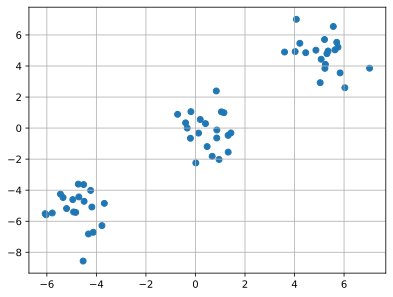

In [12]:
plt.clf()
plt.scatter(Y[:,0], Y[:,1])
plt.grid()

Add random dimensions:

In [13]:
Ndata = Y.shape[0]
Y = np.concatenate( (Y, np.random.randn(Ndata,5)), axis=1 )

In [14]:
Y.shape

(60, 7)

Coba plot data pada dimensi lain (tidak penting) yang sudah ditambahkan:

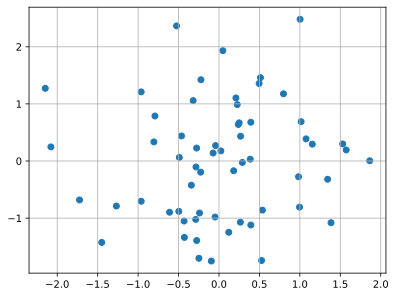

In [15]:
plt.clf()
plt.scatter(Y[:,2], Y[:,6])
plt.grid()

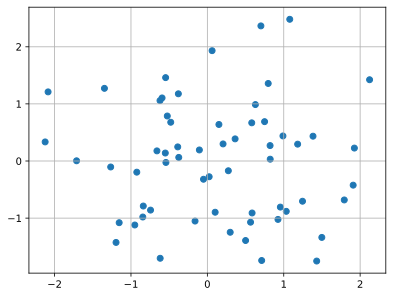

In [16]:
plt.clf()
plt.scatter(Y[:,1], Y[:,6])
plt.grid()

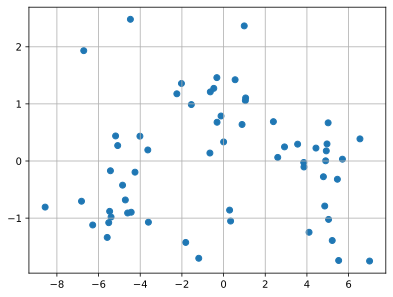

In [17]:
plt.clf()
plt.scatter(Y[:,1], Y[:,6])
plt.grid()

In [18]:
labels = np.concatenate( ([0]*20, [1]*20, [2]*20) )

In [19]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

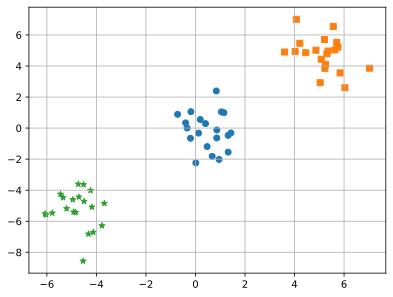

In [20]:
plt.clf()
markers = ["o", "s", "*"]
for i in range(3):
    idx = labels==i
    plt.scatter(Y[idx,0], Y[idx,1], marker=markers[i])
plt.grid()

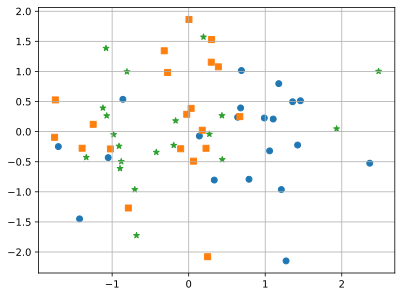

In [21]:
plt.clf()
markers = ["o", "s", "*"]
for i in range(3):
    idx = labels==i
    plt.scatter(Y[idx,6], Y[idx,2], marker=markers[i])
plt.grid()

Hitung rata-rata: $\bar{\mathbf{y}}$, gunakan metode `np.mean`.

In [22]:
ybar = np.mean(Y,axis=0)
ybar

array([ 0.28668126, -0.21866308,  0.02449878,  0.11059122,  0.13455897,
        0.0425127 , -0.00225335])

Geser data terhadap rata-rata:

In [23]:
Yshifted = Y - ybar

Rata-rata dari data yang sekarang seharusnya adalah nol (vektor).

In [24]:
np.mean(Yshifted,axis=0)

array([ 1.77635684e-16,  1.33226763e-16,  2.40548322e-17,  3.14563190e-17,
       -6.66133815e-17,  2.59052039e-17,  4.62592927e-17])

Hitung matriks kovariansi: $\mathbf{C}$

$$
\mathbf{C} = \frac{1}{N} \mathbf{Y}^{\mathsf{T}} \mathbf{Y}
$$

In [27]:
Yshifted.shape

(60, 7)

In [28]:
C = Yshifted.T @ Y / N

(7,60) (60,7)

In [30]:
C.shape

(7, 7)

Alternatif:
```python
C = np.matmul( Yshifted.transpose(), Yshifted )/N
```

Hitung pasangan eigen dari matriks kovariansi:

In [51]:
λss, ws = np.linalg.eigh(C)

In [52]:
λss

array([ 0.58582421,  0.73443647,  0.83235696,  1.06489194,  1.17897935,
        1.23026073, 33.93571718])

In [33]:
λ_unsrt, w_unsrt = np.linalg.eig(C)

In [34]:
λ_unsrt

array([33.93571718,  0.58582421,  0.73443647,  0.83235696,  1.06489194,
        1.23026073,  1.17897935])

In [35]:
w_unsrt.shape

(7, 7)

Cek persamaan eigen:
$$
\mathbf{C} \mathbf{w} = \lambda \mathbf{w}
$$

In [42]:
C @ w_unsrt[:,2]

array([-0.12600673,  0.09377876,  0.1598413 , -0.43051793,  0.29607736,
        0.40224068, -0.23317478])

In [43]:
λ_unsrt[2] * w_unsrt[:,2]

array([-0.12600673,  0.09377876,  0.1598413 , -0.43051793,  0.29607736,
        0.40224068, -0.23317478])

(Lakukan sort jika perlu)

In [46]:
idx_sorted = np.argsort(λ_unsrt)[::-1]

In [47]:
idx_sorted

array([0, 5, 6, 4, 3, 2, 1])

In [48]:
λ = λ_unsrt[idx_sorted]

Eigenvalue yang sudah disort:

In [49]:
λ

array([33.93571718,  1.23026073,  1.17897935,  1.06489194,  0.83235696,
        0.73443647,  0.58582421])

Eigenvektor yang sudah disort:

In [50]:
w = w_unsrt[:,idx_sorted]

Perbandingan nilai eigen (variansi)

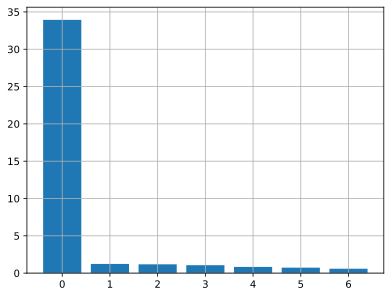

In [53]:
plt.bar(range(len(λ)), λ)
plt.grid()

Lakukan proyeksi:

$$
\mathbf{X} = \mathbf{Y} \mathbf{W}
$$

In [56]:
Yshifted.shape, w.shape

((60, 7), (7, 7))

Matrix Y: (60,7), jumlah data 60, jumlah fitur 7

Matrix W: (7,D), D: jumlah dimensi baru

Matrix X: (60,D)

Proyeksikan data ke dua dimensi pertama:

In [57]:
w[:,0:1]

array([[-0.69712993,  0.54165788],
       [-0.71620369, -0.53964215],
       [-0.01504686, -0.21553326],
       [ 0.02098423, -0.3160044 ],
       [-0.01539429,  0.15913506],
       [-0.01249781,  0.1899581 ],
       [-0.00148325,  0.45571008]])

In [58]:
Yproj = Y @ w[:,0:2]

In [59]:
Yproj.shape

(60, 2)

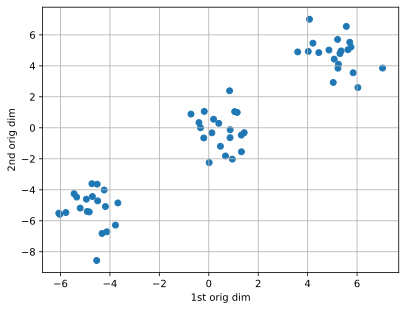

In [61]:
plt.scatter(Y[:,0], Y[:,1])
plt.xlabel("1st orig dim")
plt.ylabel("2nd orig dim")
plt.grid()

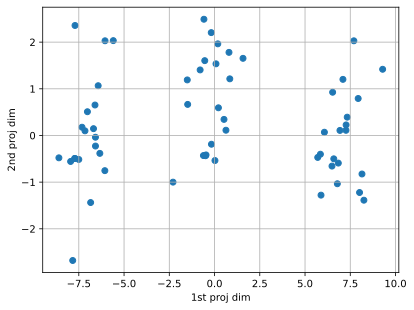

In [60]:
plt.scatter(Yproj[:,0], Yproj[:,1])
plt.xlabel("1st proj dim")
plt.ylabel("2nd proj dim")
plt.grid()

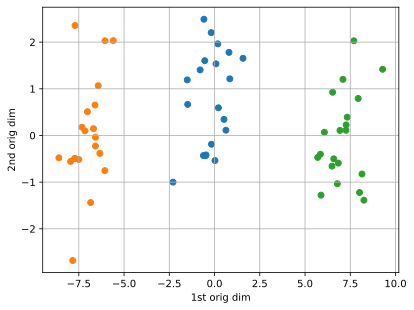

In [69]:
plt.clf()
markers = ["o", "s", "*"]
for i in range(3):
    idx = labels==i
    plt.scatter(Yproj[idx,0], Yproj[idx,1])
plt.xlabel("1st orig dim")
plt.ylabel("2nd orig dim")
plt.grid()

In [ ]:
plt.plot(Yproj_1, np.ones(Yproj_1.shape[0]), marker="o", lw=0)

Hanya memproyeksikan ke 1st proj dim (nilai eigen paling besar):

In [62]:
Yproj_1 = np.matmul(Y, w[:,0:1] )
Yproj_1.shape

(60, 1)

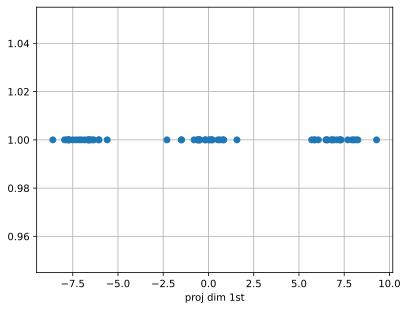

In [64]:
plt.plot(Yproj_1, np.ones(Yproj_1.shape[0]), marker="o", lw=0)
plt.xlabel("proj dim 1st")
plt.grid()

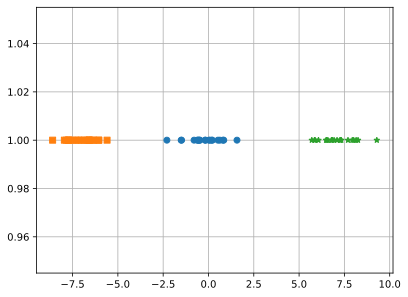

In [71]:
plt.clf()
markers = ["o", "s", "*"]
for i in range(3):
    idx = labels==i
    yplot = Yproj_1[idx,0]
    plt.plot(yplot, np.ones(len(yplot)), marker=markers[i], lw=0)
plt.grid()

**NOTE: sumbu x bukan menyatakan fitur pertama (desc1), namum fitur (dimensi) yang sudah ditransformasi.**

Bagaimana jika data diproyeksi ke dimensi proyeksi ke-dua saja?

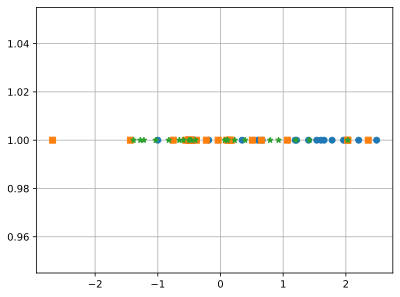

In [73]:
plt.clf()
markers = ["o", "s", "*"]
for i in range(3):
    idx = labels==i
    yplot = Yproj_2[idx]
    plt.plot(yplot, np.ones(len(yplot)), marker=markers[i], lw=0)
plt.grid()

# Pair plot

In [74]:
import pandas as pd

In [75]:
import seaborn as sns
sns.set()

In [76]:
labelsString = []
for i in range(len(labels)):
    labelsString.append("class"+str(labels[i]))

In [77]:
columns = ["desc"+str(i) for i in range(1,8)]
columns

['desc1', 'desc2', 'desc3', 'desc4', 'desc5', 'desc6', 'desc7']

In [78]:
Ypd = pd.DataFrame(Y, columns=columns)

In [79]:
labelsDF = pd.DataFrame(labelsString, columns=["class"])
labelsDF.head()

,class
0,class0
1,class0
2,class0
3,class0
4,class0


In [80]:
YDF = pd.merge(Ypd, labelsDF, left_index=True, right_index=True)
YDF.head()

,desc1,desc2,desc3,desc4,desc5,desc6,desc7,class
0,0.471435,-1.190976,-0.248432,-0.617707,-0.682884,0.436258,-1.703013,class0
1,1.432707,-0.312652,0.393711,-0.479324,-0.299016,0.694103,0.678630,class0
2,-0.720589,0.887163,0.239556,0.151227,0.816127,1.893534,0.639633,class0
3,0.859588,-0.636524,-0.962029,-2.085266,1.930247,-1.735349,1.210384,class0
4,0.015696,-2.242685,0.797435,-0.379811,0.702562,-0.850346,1.176812,class0


In [81]:
columns = ["desc"+str(i) for i in range(1,8)]
columns

['desc1', 'desc2', 'desc3', 'desc4', 'desc5', 'desc6', 'desc7']

In [ ]:
sns.pairplot(YDF, hue="class")

In [ ]:
YDF.head()

In [ ]:
YDF.loc[:,:"desc7"].head()

# Coba lagi:

In [ ]:
Y = []

In [ ]:
Y_1 = np.random.randn(20,2)
Y_2 = np.random.randn(20,2) + 10
Y_3 = np.random.randn(20,2) - 10
Y_4 = np.random.randn(20,2) + np.array([-10,10])
Y_5 = np.random.randn(20,2) + np.array([10,-10])

In [ ]:
Y = np.concatenate( (Y_1, Y_2, Y_3, Y_4, Y_5), axis=0 );

In [ ]:
plt.clf()
plt.scatter(Y[:,0], Y[:,1])

In [ ]:
Ndata = Y.shape[0]
Y = np.concatenate( (Y, np.random.randn(Ndata,5)), axis=1 )

In [ ]:
ybar = np.mean(Y,axis=0)
ybar

In [ ]:
Yshifted = Y - ybar

In [ ]:
np.mean(Yshifted,axis=0)

In [ ]:
N = Yshifted.shape[0]
N

In [ ]:
C = np.matmul( Yshifted.transpose(), Yshifted )/N

In [ ]:
λ_unsrt, w_unsrt = np.linalg.eig(C)

In [ ]:
λ_unsrt

In [ ]:
idx_sorted = np.argsort(λ_unsrt)[::-1]
idx_sorted

In [ ]:
W = w_unsrt[:,idx_sorted]
λ = λ_unsrt[idx_sorted]

In [ ]:
λ

In [ ]:
plt.bar(np.arange(len(λ)), λ)